In [1]:
import os
import json
from datetime import date, datetime, timedelta
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
from libsstock import getYFdate, getInfoBuy, plotBasic, computeIchimoku, plotIchimoku
from stockList import allStocks, stockList
import telepot

In [2]:
bot_token = '***REMOVED***'
bot_chatID = '***REMOVED***'
mybot = telepot.Bot(bot_token)

In [3]:
# run only on week days
if datetime.today().weekday() in [0, 1, 2, 3, 4] and datetime.today().hour >= 9 and datetime.today().hour <= 21:
    print('in the right timeframe')
    mybot.sendMessage(bot_chatID, 'hello world')

in the right timeframe


In [13]:
mybot.sendPhoto(bot_chatID, open('fig1.png', 'r'))

FileNotFoundError: [Errno 2] No such file or directory: 'fig1.png'

In [4]:
stockProspectFull = [
    {'stockname': 'STM.PA',},
    {'stockname': 'SO.PA',},
    {'stockname': 'AI.PA',},
    {'stockname': 'TEP.PA',},
    {'stockname': 'DBV.PA',},
    {'stockname': 'SIGHT.PA',},
    {'stockname': 'NANO.PA',},
    {'stockname': 'SAN.PA',},
    {'stockname': 'AKA.PA',},
    {'stockname': 'GNFT.PA'},
    {'stockname': 'POXEL.PA'},
    {'stockname': 'EUCAR.PA'},
]
stockProspect = [
    {'stockname': 'EUCAR.PA'},
]

In [5]:

stockProspect = getYFdate(stockProspect)
stockProspect = getInfoBuy(stockProspect, allStocks)

In [9]:
def createMessage(stockList):
    stockProspect = getInfoBuy(stockList, stockList)
    for stock in stockProspect:
        diff = stock['valueNow'] - stock['boughtNetValue']
        if diff > -10000:
            strOut = stock['name'] + ' :\n'
            strOut += ' - boughtNetValue : {:.3f} €\n'.format(stock['boughtNetValue'])
            strOut += ' - valueNow       : {:.3f} €\n'.format(stock['valueNow'])
            strOut += ' - diff           : {:.3f} €\n'.format(diff)
            strOut += ' - cashIn         : {:.2f} €\n'.format(diff*stock['boughtQ']) 
            telegram_bot_sendtext(strOut)



In [7]:
for stock in stockProspect:
    #plotBasic(stock)
    stock = computeIchimoku(stock)
    fig = plotIchimoku(stock)
    fig.update_layout(template="plotly_dark", xaxis_rangeslider_visible=False, height=600)
    fig.show()
    


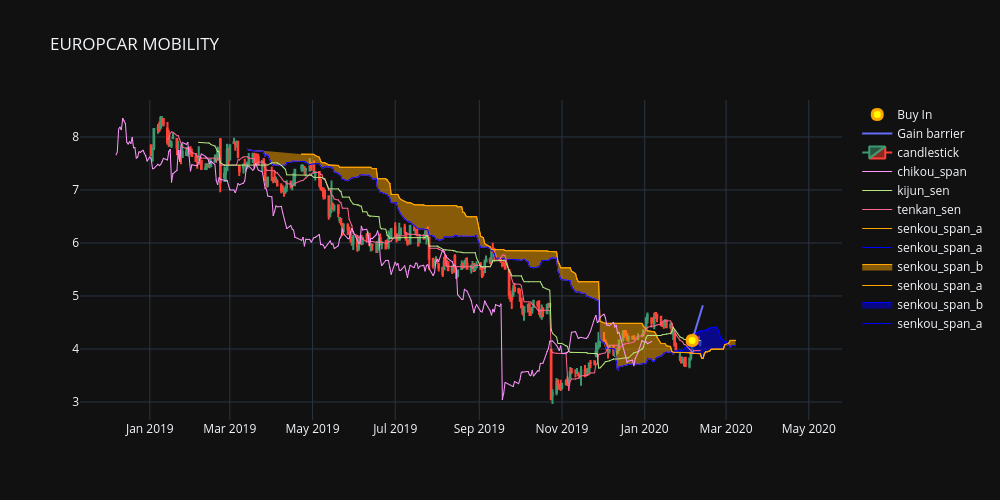

In [35]:
#import plotly.io as pio
#import plotly.graph_objects as go
from _plotly_utils.utils import PlotlyJSONEncoder
from IPython.display import Image as ImageD
import io
import requests
import json
from PIL import Image
server_url = "http://docker_orcapp_1:9091"

def genIMGfromFile(filenameout=''):
    request_params = {
        "figure": fig.to_dict(),
        "format": "png", # any format from "png", "jpeg", "webp", "svg", "pdf", "eps"
        "scale": 1,
        "width": 1000,
        "height": 500
    }
    json_str = json.dumps(request_params, cls=PlotlyJSONEncoder)
    response = requests.post(server_url + "/", data=json_str)
    image = response.content
    if len(filenameout) > 0:
        imgPIL = Image.open(io.BytesIO(image))
        #with open("img.png", 'w') as file:
        imgPIL.save(filenameout)
    return image
display(ImageD(data=genIMGfromFile('img.png')))

In [7]:
dataFig = []
dataFig.append({
        'x': [stock['name'] for stock in stockList],
        'y': [stock['netActualGain'] for stock in stockList],
        'type': 'bar',
})
fig = go.Figure(data=dataFig, layout={'title': '€ Gain by shares'})
fig.update_layout(template="plotly_dark", xaxis_rangeslider_visible=False)
fig.show()
print('Total Gain ' + str(np.sum([stock['netActualGain'] for stock in stockList])))

KeyError: 'name'